<a href="https://colab.research.google.com/github/ugurursavas/spatial_inequalities_turkiye/blob/main/spatial_inequality_turkiye.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>





# Load the libraries

In [ ]:

!pip install inequality mapclassify libpysal geopandas seaborn watermark

import inequality as ineq
import numpy as np
import pandas as pd
import geopandas as gpd
import libpysal as lps
import seaborn as sns
import matplotlib.pyplot as plt
import watermark
import os
import geopandas as gpd
import matplotlib.pyplot as plt
import mapclassify





!pip install tslearn --quiet
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tslearn.clustering import TimeSeriesKMeans
from tslearn.preprocessing import TimeSeriesScalerMeanVariance





   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 882.2/882.2 kB 14.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 30.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 389.9/389.9 kB 10.2 MB/s eta 0:00:00






# The dataset

Dataset includes gdp per capita over the years 2004-2023 for 81 provinces
(NUTS-III) for Turkiye. RegionID, subregionID, provinceID columns represent the NUTS-I,  (12 regions total), NUTS-II (26 regions) and  NUTS-III (81 provinces), respectively.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


gdp = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Project2025a/data/wide_income_pc_data_3.xlsx')


geojson_data = gpd.read_file('/content/drive/MyDrive/Colab Notebooks/Project2025a/data/TUR_ADM1.geojson')
gdf = pd.merge(geojson_data, gdp, how='left', left_on='asdf_id', right_on='asdf_id')
gdf.head()



Mounted at /content/drive


,id,Level,asdf_id,gqid,shapeGroup,shapeID,shapeISO,shapeName_x,shapeType,geometry,...,gdppc_2014,gdppc_2015,gdppc_2016,gdppc_2017,gdppc_2018,gdppc_2019,gdppc_2020,gdppc_2021,gdppc_2022,gdppc_2023
0,0,ADM1,0,0,TUR,TUR-ADM1-80719077B77822815,TR-01,Adana,ADM1,"MULTIPOLYGON (((35.38791 36.55628, 35.38883 36...",...,13171.396314,13877.767024,14435.589802,14946.317915,14815.580204,14956.374166,15810.963122,17545.489851,18747.219787,20049.204113
1,1,ADM1,1,1,TUR,TUR-ADM1-80719077B28599679,TR-02,Adıyaman,ADM1,"POLYGON ((37.861 37.46666, 37.87451 37.46648, ...",...,8010.685223,8503.908596,8609.806318,8988.842029,9215.684862,9292.833598,9871.413009,10472.984175,11180.636964,12994.522115
2,2,ADM1,2,2,TUR,TUR-ADM1-80719077B84550223,TR-03,Afyonkarahisar,ADM1,"POLYGON ((30.48061 38.19903, 30.49275 38.19655...",...,12730.464586,13244.313590,13931.617317,15223.499461,15264.136511,14922.779558,15030.093145,15564.626253,16125.684398,16669.864935
3,3,ADM1,3,3,TUR,TUR-ADM1-80719077B65173278,TR-04,Ağrı,ADM1,"POLYGON ((43.77542 39.25004, 43.79639 39.26875...",...,5524.034690,5817.799382,6527.340458,6563.299365,6673.627878,6787.884722,7363.297132,7682.336975,8429.087042,9370.543661
4,4,ADM1,4,4,TUR,TUR-ADM1-80719077B72380009,TR-05,Amasya,ADM1,"POLYGON ((36.3878 40.66228, 36.39811 40.67508,...",...,12813.235253,14000.332126,14521.723543,15010.118586,14681.809024,14661.065719,15070.224803,15114.448112,16090.112249,16333.788866


In [ ]:
gdf

,id,Level,asdf_id,gqid,shapeGroup,shapeID,shapeISO,shapeName_x,shapeType,geometry,...,gdppc_2014,gdppc_2015,gdppc_2016,gdppc_2017,gdppc_2018,gdppc_2019,gdppc_2020,gdppc_2021,gdppc_2022,gdppc_2023
0,0,ADM1,0,0,TUR,TUR-ADM1-80719077B77822815,TR-01,Adana,ADM1,"MULTIPOLYGON (((35.38791 36.55628, 35.38883 36...",...,13171.396314,13877.767024,14435.589802,14946.317915,14815.580204,14956.374166,15810.963122,17545.489851,18747.219787,20049.204113
1,1,ADM1,1,1,TUR,TUR-ADM1-80719077B28599679,TR-02,Adıyaman,ADM1,"POLYGON ((37.861 37.46666, 37.87451 37.46648, ...",...,8010.685223,8503.908596,8609.806318,8988.842029,9215.684862,9292.833598,9871.413009,10472.984175,11180.636964,12994.522115
2,2,ADM1,2,2,TUR,TUR-ADM1-80719077B84550223,TR-03,Afyonkarahisar,ADM1,"POLYGON ((30.48061 38.19903, 30.49275 38.19655...",...,12730.464586,13244.313590,13931.617317,15223.499461,15264.136511,14922.779558,15030.093145,15564.626253,16125.684398,16669.864935
3,3,ADM1,3,3,TUR,TUR-ADM1-80719077B65173278,TR-04,Ağrı,ADM1,"POLYGON ((43.77542 39.25004, 43.79639 39.26875...",...,5524.034690,5817.799382,6527.340458,6563.299365,6673.627878,6787.884722,7363.297132,7682.336975,8429.087042,9370.543661
4,4,ADM1,4,4,TUR,TUR-ADM1-80719077B72380009,TR-05,Amasya,ADM1,"POLYGON ((36.3878 40.66228, 36.39811 40.67508,...",...,12813.235253,14000.332126,14521.723543,15010.118586,14681.809024,14661.065719,15070.224803,15114.448112,16090.112249,16333.788866
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,76,ADM1,76,76,TUR,TUR-ADM1-80719077B83749854,TR-77,Yalova,ADM1,"POLYGON ((29.4818 40.56397, 29.48439 40.56645,...",...,19866.078918,21652.936153,21839.877516,22126.901351,22634.490569,22475.573483,23494.033690,27038.776499,26753.193198,28692.302645
77,77,ADM1,77,77,TUR,TUR-ADM1-80719077B67647683,TR-66,Yozgat,ADM1,"POLYGON ((35.33995 40.25508, 35.28463 40.22667...",...,11430.562234,12017.072764,12480.012635,12324.590947,12459.947621,11982.205603,13098.397738,12818.537634,13752.625214,14380.267127
78,78,ADM1,78,78,TUR,TUR-ADM1-80719077B51620989,TR-67,Zonguldak,ADM1,"MULTIPOLYGON (((31.85365 41.0083, 31.88498 41....",...,12651.585849,13177.270950,13149.314505,13975.439443,13504.482256,12416.632414,13601.249315,15010.549718,15855.171535,14686.616218
79,79,ADM1,79,79,TUR,TUR-ADM1-80719077B759750,TR-73,Şırnak,ADM1,"POLYGON ((43.49919 37.74179, 43.43868 37.74784...",...,8891.714352,9069.779919,8895.460408,10522.474545,10842.248040,11132.955071,11912.868518,13002.109446,12911.824679,14993.943004


# Plot maps and figures

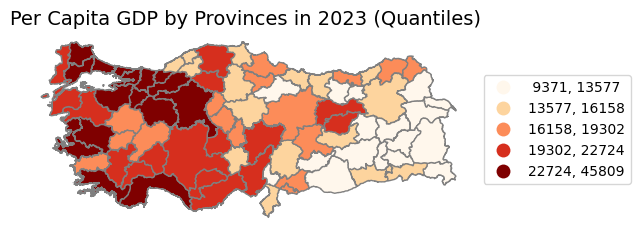

In [ ]:


ax = gdf.plot(
    column="gdppc_2023",
    scheme="Quantiles",
    k=5,
    cmap="OrRd",
    legend=True,
    edgecolor="grey",
    legend_kwds={
        "loc": "center left",
        "bbox_to_anchor": (1, 0.5),
        "fmt": "{:.0f}",

    }
)

ax.set_axis_off()
ax.set_title("Per Capita GDP by Provinces in 2023 (Quantiles) ", fontsize=14)
plt.tight_layout()
plt.show()



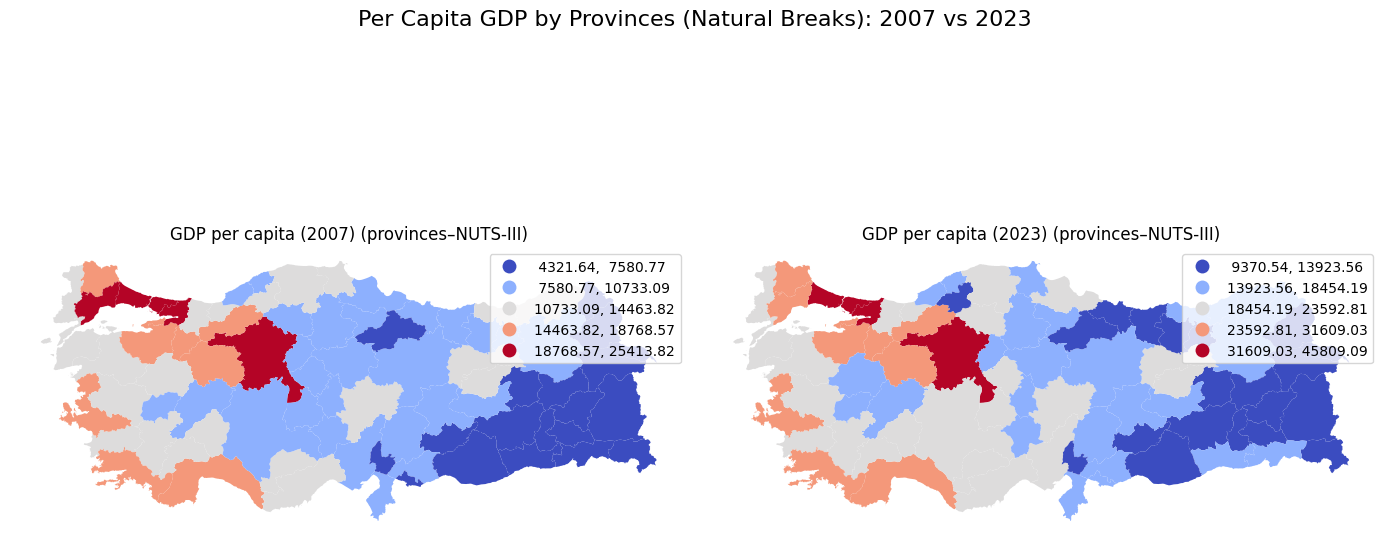

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 7))

gdf.plot(column="gdppc_2007", scheme="NaturalBreaks", k=5, cmap='coolwarm',
         legend=True, ax=axes[0])
axes[0].set_title('GDP per capita (2007) (provinces–NUTS-III)')
axes[0].axis("off")

gdf.plot(column="gdppc_2023", scheme="NaturalBreaks", k=5, cmap='coolwarm',
         legend=True, ax=axes[1])
axes[1].set_title('GDP per capita (2023) (provinces–NUTS-III)')
axes[1].axis("off")

plt.suptitle("Per Capita GDP by Provinces (Natural Breaks): 2007 vs 2023", fontsize=16, y=1.02)

plt.tight_layout()
plt.show()


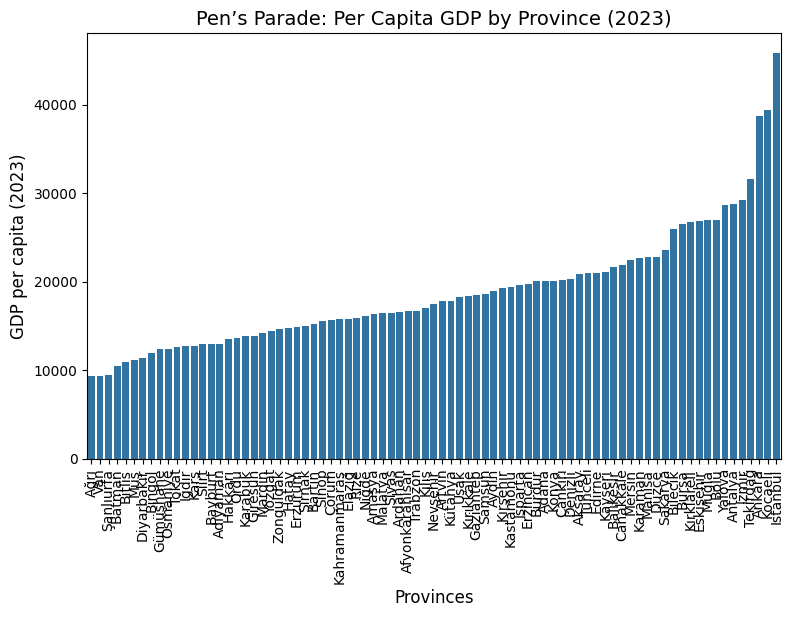

In [ ]:
from inequality.pen import pen

f = pen(gdf, 'gdppc_2023', 'shapeName_x')

ax = f
ax.set_xlabel("Provinces", fontsize=12)
ax.set_ylabel("GDP per capita (2023)", fontsize=12)
ax.set_title("Pen’s Parade: Per Capita GDP by Province (2023)", fontsize=14)

plt.show()


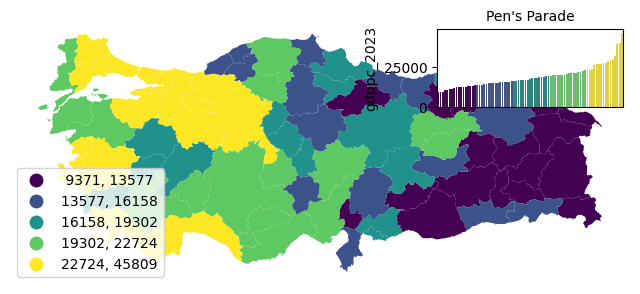

In [ ]:
from inequality.pen import pengram

f = pengram(
    gdf,
    'gdppc_2023',
    "shapeName_x",
    xticks=False,
    leg_pos='lower left',
    fmt="{:.0f}"
)



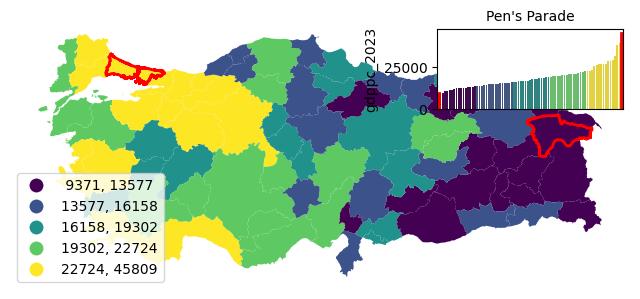

In [ ]:
#provinces with the highest and lowest pc income

from inequality.pen import pengram
f = pengram(gdf,'gdppc_2023'
,
'shapeName_x', leg_pos='lower left'
,
fmt="{:.0f}"
,
xticks=False,
query=['Ağrı'
,
'Istanbul'])

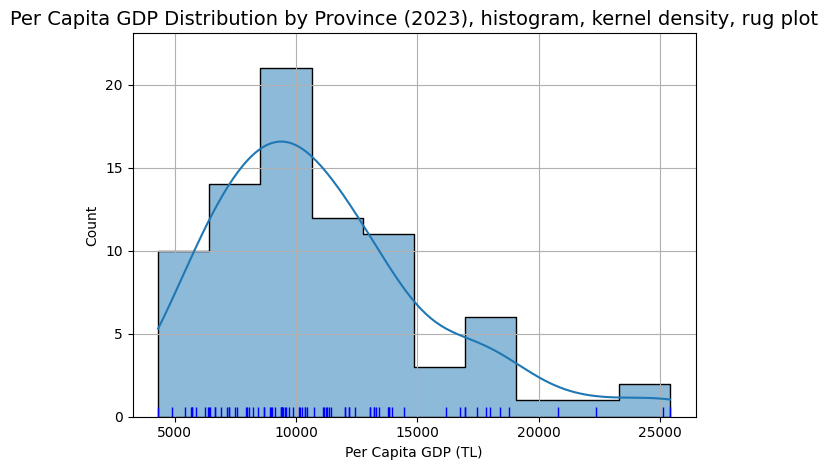

In [ ]:


years = range(2007, 2023, 17)
yvars = [f'gdppc_{year}' for year in years]

sns.histplot(gdf[yvars[-1]], kde=True, element="step", bins=10, edgecolor="black")
sns.rugplot(gdf[yvars[-1]], color='blue')

plt.title("Per Capita GDP Distribution by Province (2023), histogram, kernel density, rug plot",  fontsize=14)
plt.xlabel("Per Capita GDP (TL)")
plt.ylabel("Count")
plt.tight_layout()
plt.grid(True)
plt.show()


# Lorenz curves

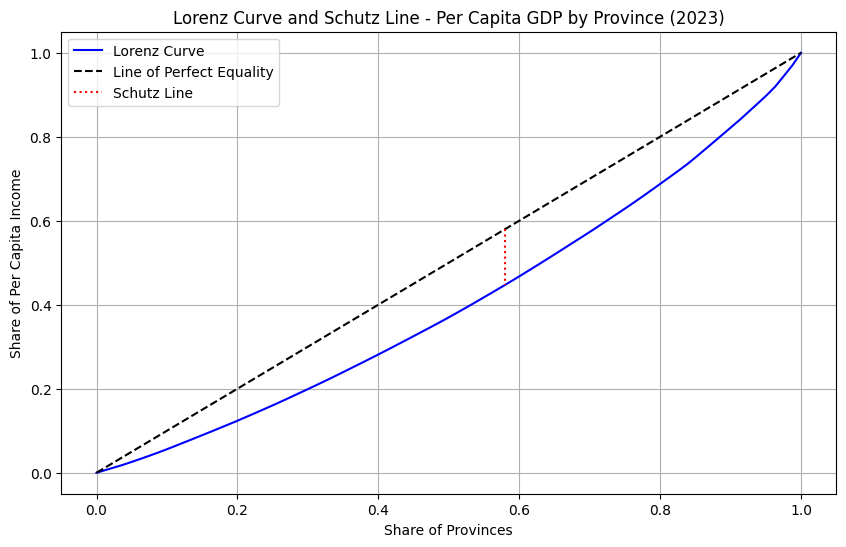

In [ ]:

from inequality.schutz import Schutz

s = Schutz(gdf, 'gdppc_2023')
s.plot(
    xlabel='Share of Provinces',
    ylabel='Share of Per Capita Income',
    title='Lorenz Curve and Schutz Line - Per Capita GDP by Province (2023)',
)




In [ ]:
years = range(2004, 2024)

yvars = [f'gdppc_{year}' for year in years]
ginis = [ineq.gini.Gini(gdf[yvar]).g for yvar in yvars]
res_df = pd.DataFrame(data=ginis, columns=['Gini'], index=years)
cv = gdf[yvars].std() / gdf[yvars].mean()
res_df['CV'] = cv.values
s = [ineq.schutz.Schutz(gdf, yvar).distance for yvar in yvars]
res_df['Schutz'] = s
res_df['Gini_rank'] = res_df['Gini'].rank()
res_df['CV_rank'] = res_df['CV'].rank()
res_df['Schutz_rank'] = res_df['Schutz'].rank()
res_df

/usr/local/lib/python3.11/dist-packages/inequality/gini.py:43: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  x = x.ravel()  # ensure shape is (n,)


,Gini,CV,Schutz,Gini_rank,CV_rank,Schutz_rank
2004,0.210747,0.389937,0.149743,17.0,17.0,17.0
2005,0.209812,0.389647,0.148559,16.0,16.0,16.0
2006,0.213393,0.396596,0.152415,18.0,18.0,18.0
2007,0.216528,0.404066,0.154538,20.0,20.0,20.0
2008,0.215672,0.399154,0.153317,19.0,19.0,19.0
2009,0.205380,0.379037,0.145634,15.0,15.0,15.0
2010,0.193278,0.359071,0.135723,11.0,7.0,10.0
2011,0.198580,0.369233,0.139256,14.0,14.0,14.0
2012,0.193978,0.360529,0.136714,13.0,11.0,12.0
2013,0.192490,0.360910,0.135279,10.0,12.0,8.0


In [ ]:
#yorum: 2020 yılı, tüm göstergelere göre en düşük eşitsizlik yılı.
#2007–2009, açık ara en yüksek eşitsizlik dönemi.
#2021–2023 arası, görünürde genel eşitsizlik çok artmasa da, CV'nin yükselmesi, zengin bölgelerle
#diğerleri arasındaki farkın büyüdüğüne işaret eder mi?


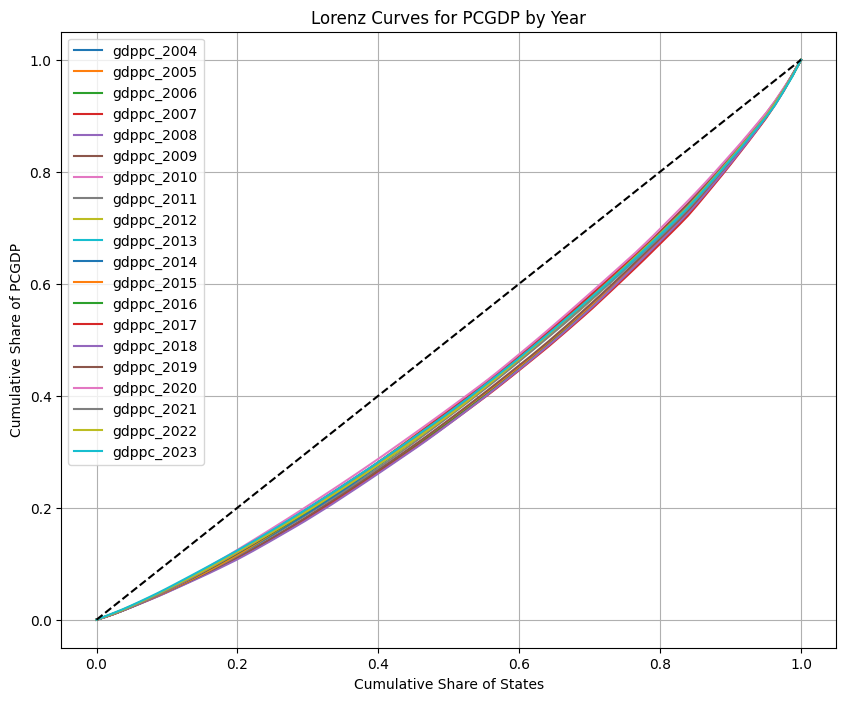

In [ ]:
# Plot Lorenz Curves for each year
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import cumfreq

def lorenz_curve(incomes):
    sorted_incomes = np.sort(incomes)
    cumulative_incomes = np.cumsum(sorted_incomes)
    normalized = cumulative_incomes / cumulative_incomes[-1]
    lorenz_curve = np.insert(normalized, 0, 0)
    n = len(incomes)
    x = np.linspace(0.0, 1.0, n + 1)
    return x, lorenz_curve

plt.figure(figsize=(10, 8))

for yvar in yvars:
    incomes = gdf[yvar].values
    x, y = lorenz_curve(incomes)
    plt.plot(x, y, label=yvar)

# Plotting the line of equality
plt.plot([0, 1], [0, 1], color='black', linestyle='--')

# Adding titles and labels
plt.title('Lorenz Curves for PCGDP by Year')
plt.xlabel('Cumulative Share of States')
plt.ylabel('Cumulative Share of PCGDP')
plt.legend()
plt.grid(True)
plt.show()



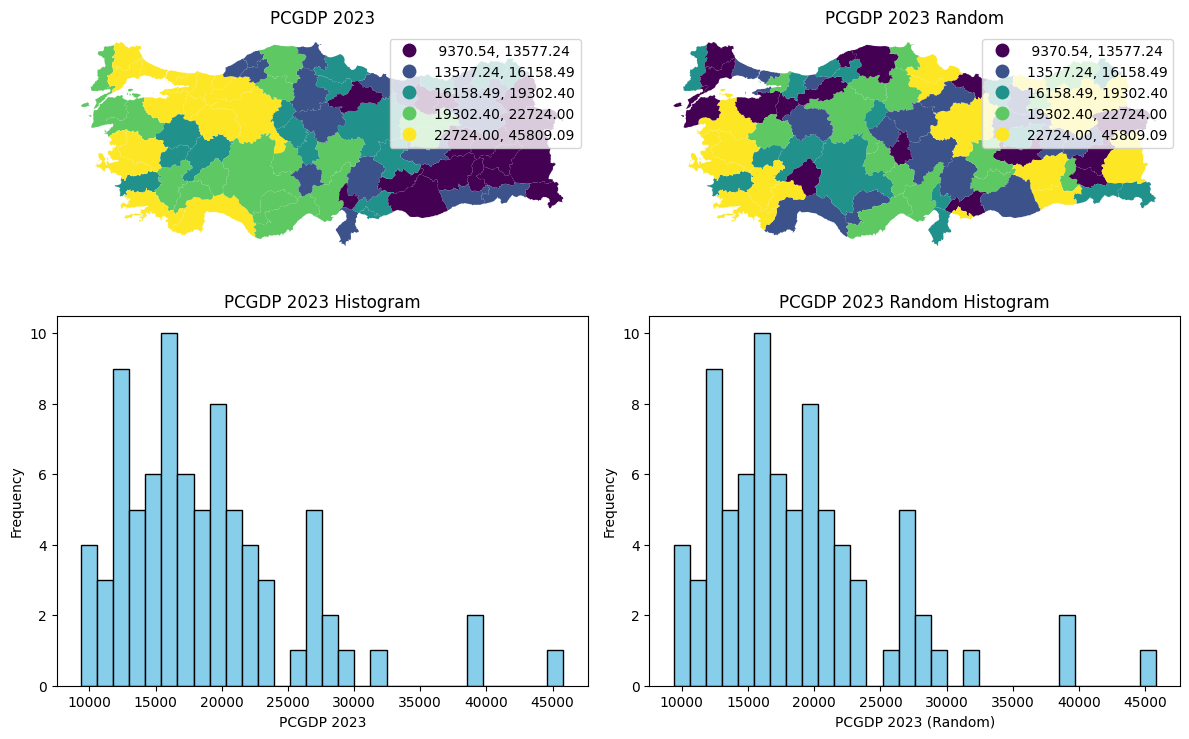

In [ ]:


# Create a random permutation column for 2023 data
gdf['gdppc_2023r'] = np.random.permutation(gdf['gdppc_2023'])

# Set up a 2x2 grid
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Choropleth for original 2023 data
gdf.plot(column='gdppc_2023', ax=axs[0, 0], scheme='quantiles', cmap='viridis', legend=True)
axs[0, 0].set_title('PCGDP 2023')
axs[0, 0].axis('off')

# Choropleth for randomly permuted data
gdf.plot(column='gdppc_2023r', ax=axs[0, 1], scheme='quantiles', cmap='viridis', legend=True)
axs[0, 1].set_title('PCGDP 2023 Random')
axs[0, 1].axis('off')

# Histogram for original 2023 data
axs[1, 0].hist(gdf['gdppc_2023'], bins=30, color='skyblue', edgecolor='black')
axs[1, 0].set_title('PCGDP 2023 Histogram')
axs[1, 0].set_xlabel('PCGDP 2023')
axs[1, 0].set_ylabel('Frequency')

# Histogram for randomly permuted data
axs[1, 1].hist(gdf['gdppc_2023r'], bins=30, color='skyblue', edgecolor='black')
axs[1, 1].set_title('PCGDP 2023 Random Histogram')
axs[1, 1].set_xlabel('PCGDP 2023 (Random)')
axs[1, 1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


# Regional Inequality Decomposition

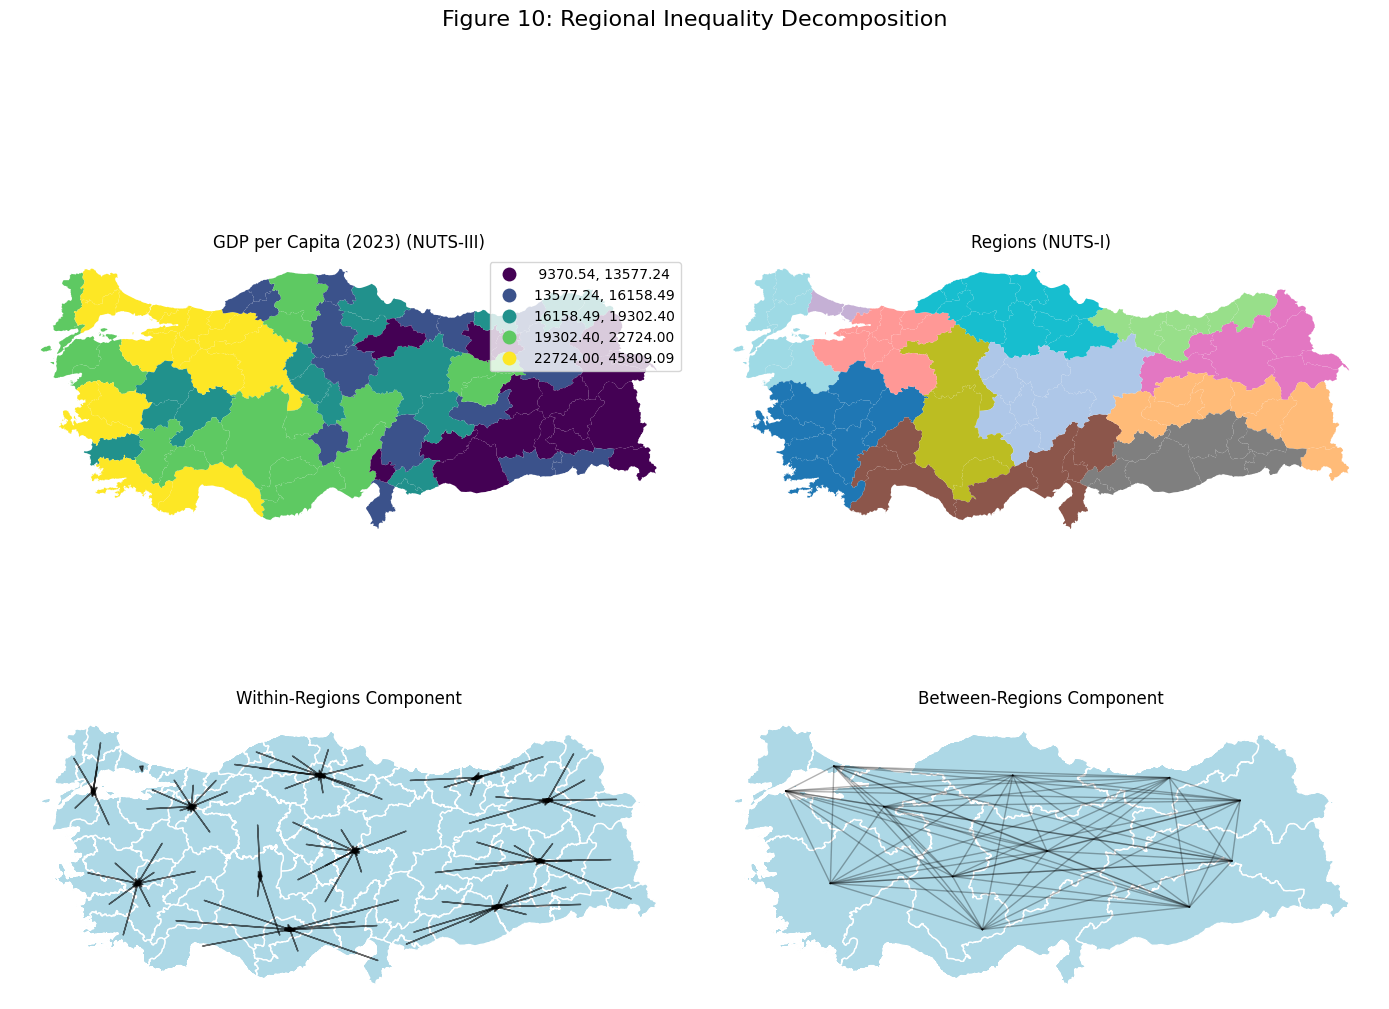

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Project to metric CRS (important for proper distances)
gdf_proj = gdf.to_crs(epsg=32636)

# Step 2: Compute province centroids
gdf_proj['centroid'] = gdf_proj.geometry.centroid

# Step 3: Dissolve by region (keep numeric columns + geometry)
numeric_cols = gdf_proj.select_dtypes(include='number').columns.tolist()
cols_to_keep = ['region', 'geometry'] + numeric_cols
region_means = gdf_proj[cols_to_keep].dissolve(by='region', aggfunc='mean')
region_means['centroid'] = region_means.geometry.centroid

# Step 4: Setup plot grid
fig, axs = plt.subplots(2, 2, figsize=(14, 12))

# Panel 1: Map of GDP per capita (NUTS-III)
gdf.plot(column='gdppc_2023', cmap='viridis', scheme='quantiles',
         legend=True, ax=axs[0, 0])
axs[0, 0].set_title('GDP per Capita (2023) (NUTS-III)')
axs[0, 0].axis('off')

# Panel 2: Regions (NUTS-I)
gdf.plot(column='region', cmap='tab20', legend=False, ax=axs[0, 1])
axs[0, 1].set_title('Regions (NUTS-I)')
axs[0, 1].axis('off')

# Panel 3: Within-Regions Component
gdf_proj.plot(color='lightblue', edgecolor='white', ax=axs[1, 0])
axs[1, 0].set_title('Within-Regions Component')
for idx, row in gdf_proj.iterrows():
    p_center = row['centroid']
    r_center = region_means.loc[row['region'], 'centroid']
    axs[1, 0].arrow(p_center.x, p_center.y,
                   r_center.x - p_center.x,
                   r_center.y - p_center.y,
                   color='black', head_width=10000, alpha=0.6)
axs[1, 0].axis('off')

# Panel 4: Between-Regions Component (simplified)
region_means.plot(color='lightblue', edgecolor='white', ax=axs[1, 1])
axs[1, 1].set_title('Between-Regions Component')

region_centroids = region_means['centroid']
for i, centroid_i in region_centroids.items():
    for j, centroid_j in region_centroids.items():
        if i < j:
            axs[1, 1].plot([centroid_i.x, centroid_j.x],
                          [centroid_i.y, centroid_j.y],
                          color='black', linewidth=1, alpha=0.3)

axs[1, 1].axis('off')

# Main title
plt.suptitle("Figure 10: Regional Inequality Decomposition", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


Spatial polarization: 0.684, pseudo p-value: 0.001
Theil: 0.058
Ho mean: 0.150
KB p-value: 0.001


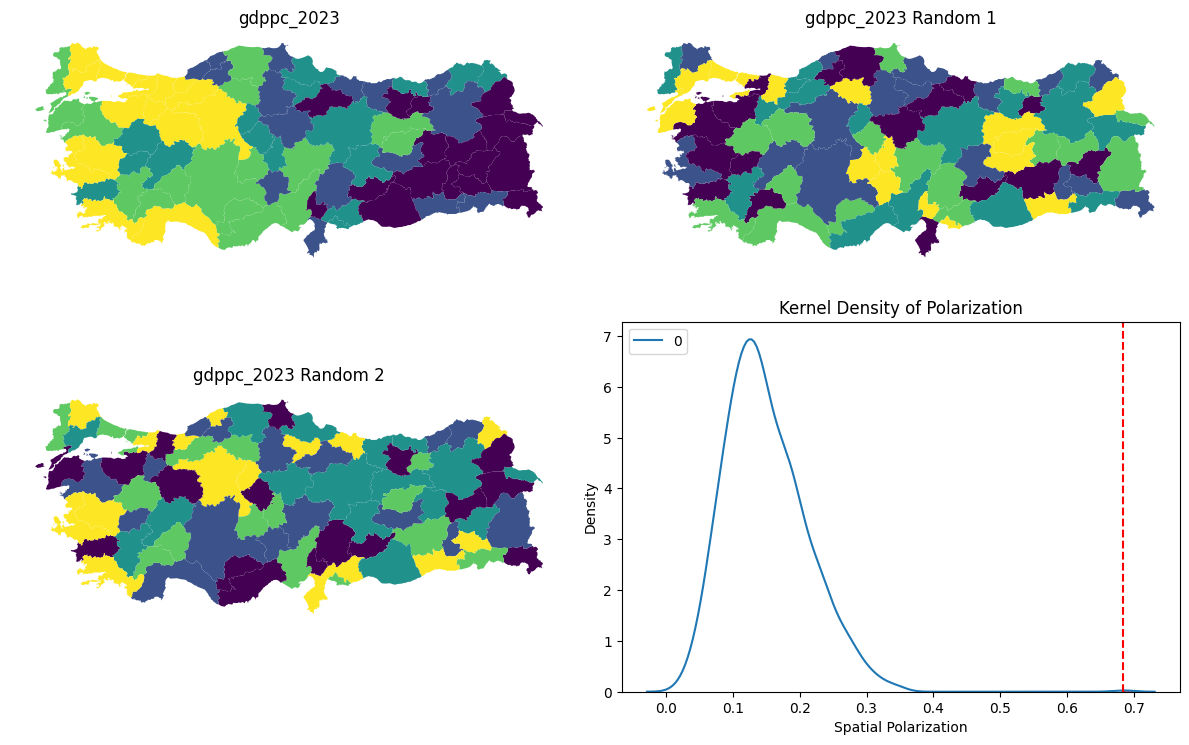

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from inequality.theil import TheilDSim


fig, axs = plt.subplots(2, 2, figsize=(12, 8))
np.random.seed(12345)


gdf.plot(column='gdppc_2023', ax=axs[0, 0], scheme='quantiles', cmap='viridis')
axs[0, 0].set_title('gdppc_2023')
axs[0, 0].axis('off')


income = gdf['gdppc_2023']
regimes = gdf['regionID']
res = TheilDSim(income, regimes, 999)


gdf['gdppc_2023r'] = np.random.permutation(gdf['gdppc_2023'])
gdf.plot(column='gdppc_2023r', ax=axs[0, 1], scheme='quantiles', cmap='viridis')
axs[0, 1].set_title('gdppc_2023 Random 1')
axs[0, 1].axis('off')


gdf['gdppc_2023r2'] = np.random.permutation(gdf['gdppc_2023'])
gdf.plot(column='gdppc_2023r2', ax=axs[1, 0], scheme='quantiles', cmap='viridis')
axs[1, 0].set_title('gdppc_2023 Random 2')
axs[1, 0].axis('off')


realizations = np.array([t.bg / t.T for t in res.results])
kde = sns.kdeplot(realizations, fill=False, color='blue', ax=axs[1, 1])
x, y = kde.get_lines()[0].get_data()

axs[1, 1].fill_between(x, y, where=(x >= res.bg[0][0] / res.T), interpolate=True, color='red', alpha=0.5)
axs[1, 1].axvline(x=res.bg[0][0] / res.T, color='red', linestyle='--')
axs[1, 1].set_xlabel("Spatial Polarization")
axs[1, 1].set_title("Kernel Density of Polarization")


msg = f'Spatial polarization: {res.bg[0][0] / res.T:.3f}, pseudo p-value: {res.bg_pvalue[0]}'
print(msg)
print(f'Theil: {res.T:.3f}')
print(f'Ho mean: {realizations.mean():.3f}')
print(f'KB p-value: {(realizations >= (res.bg[0][0] / res.T)).sum() / 1000:.3f}')

plt.tight_layout()
plt.show()


The overall level of regional inequality is 0.058.
The between-region component stands at 0.0397, while the within-region element is 0.0183.
In relative terms, inequality between the regions in Türkiye accounts for 68 percent of provincial income inequality, while inequality between provinces from the same region is the smaller share, presenting 32 percent of spatial inequality.

 How do we calculate between and within regions inequality:

 Spatial Polarization: between inequality/overall inequality

 0.684 = between inequality/0.058
 between inequality=0.039
 within=0.058-0.039=0.018









/usr/local/lib/python3.11/dist-packages/splot/_viz_libpysal_mpl.py:121: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroids_shp = gdf.centroid.values
/usr/local/lib/python3.11/dist-packages/splot/_viz_libpysal_mpl.py:164: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf.centroid.plot(ax=ax, **node_kws)


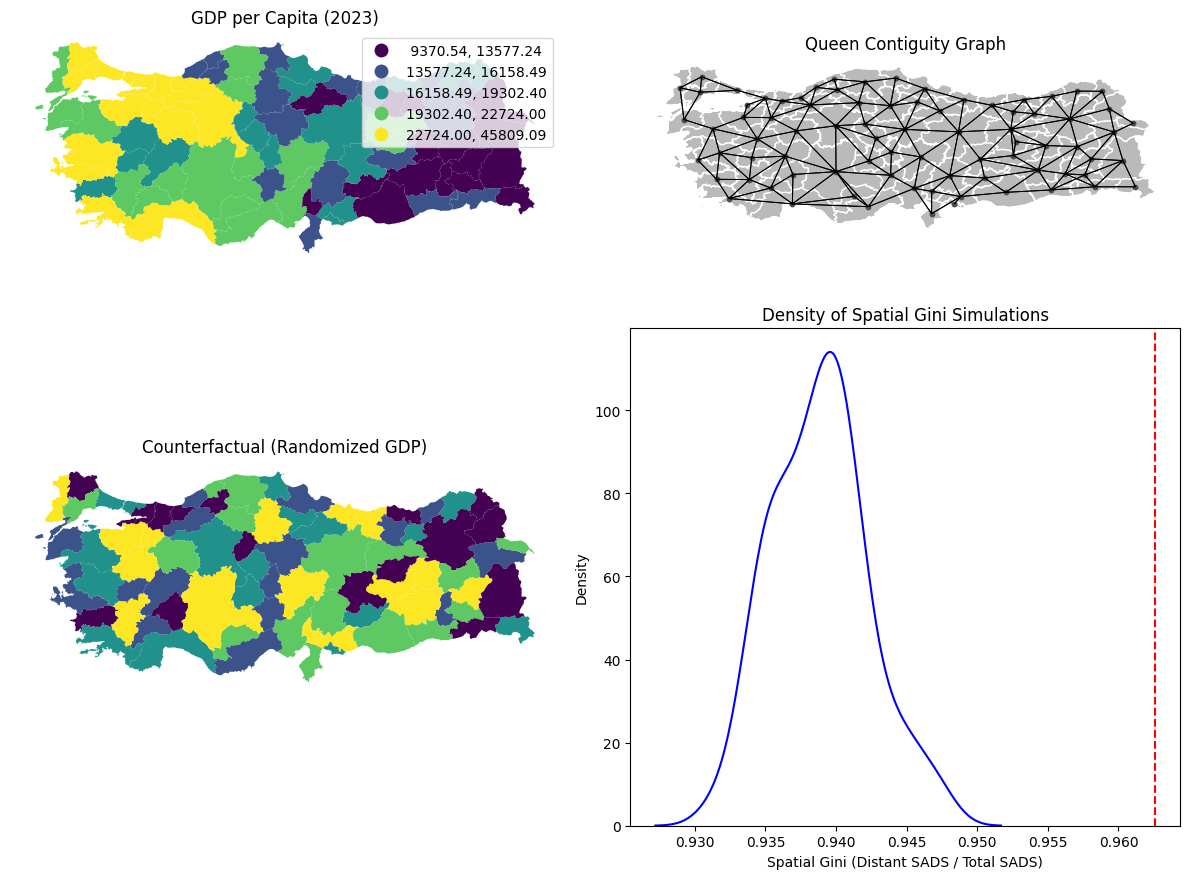

Expected Distant SADS / Total SADS: 0.94
Observed Distant SADS / Total SADS: 0.96
p-value: 0.010


In [ ]:
from inequality.gini import Gini_Spatial
import libpysal
from splot.libpysal import plot_spatial_weights

# Set random seed for reproducibility
np.random.seed(12345)



# --- Step 2: Create Queen contiguity weight matrix
wq = libpysal.weights.Queen.from_dataframe(gdf, use_index=False)
wq.transform = 'B'

# --- Step 3: Set up a 2x2 plot grid
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# --- Panel 1: Map of per capita GDP (2020)
gdf.plot(column='gdppc_2023', ax=axs[0, 0], scheme='quantiles', cmap='viridis', legend=True)
axs[0, 0].set_title('GDP per Capita (2023)')
axs[0, 0].axis('off')

# --- Panel 2: Queen Contiguity Neighbor Graph
gdf.plot(ax=axs[0, 1], color='lightblue', edgecolor='white')
plot_spatial_weights(wq, gdf, ax=axs[0, 1], edge_kws=dict(color='black', linewidth=0.5))
axs[0, 1].set_title('Queen Contiguity Graph')
axs[0, 1].axis('off')

# --- Panel 3: Counterfactual (Randomized GDP)
gdf['gdppc_2023r'] = np.random.permutation(gdf['gdppc_2023'].values)
gdf.plot(column='gdppc_2023r', ax=axs[1, 0], scheme='quantiles', cmap='viridis', legend=False)
axs[1, 0].set_title('Counterfactual (Randomized GDP)')
axs[1, 0].axis('off')

# --- Step 4: Spatial Gini Simulation
gs = Gini_Spatial(gdf['gdppc_2023'], wq)
adsum = gs.dtotal
realizations = gs.wcgp / adsum
observed = gs.wcg / adsum

# --- Panel 4: KDE plot of spatial Gini simulation values
sns.kdeplot(realizations, fill=False, color='blue', ax=axs[1, 1])
x, y = axs[1, 1].lines[0].get_data()

axs[1, 1].fill_between(x, y, where=(x >= observed), interpolate=True, color='red', alpha=0.5)
axs[1, 1].axvline(x=observed, color='red', linestyle='--')
axs[1, 1].set_xlabel("Spatial Gini (Distant SADS / Total SADS)")
axs[1, 1].set_ylabel("Density")
axs[1, 1].set_title("Density of Spatial Gini Simulations")

# --- Final Layout
plt.tight_layout()
plt.show()

# --- Console output summary
print(f"Expected Distant SADS / Total SADS: {gs.e_wcg / adsum:.2f}")
print(f"Observed Distant SADS / Total SADS: {gs.wcg / adsum:.2f}")
print(f"p-value: {gs.p_sim:.3f}")



Observed Distant SADS / Total SADS = 0.96
Expected Distant SADS / Total SADS (under null/random spatial distribution) = 0.94
p-value = 0.010

1) Rey, spatial Gini decomposition'da toplam eşitsizliği komşu birimler arası ve uzak (komşu olmayan) birimler arası farklara ayırır. Eğer gelirler mekânsal olarak kümelenmişse, komşu birimler arası farkların daha küçük olması, uzak birimler arası farkların ise daha büyük olması beklenir.

2) Bu durumda:
Gerçek (gözlenen) uzak birimler arası eşitsizlik oranı (0.96), rastgele mekânsal dağılıma göre beklenenden (0.94) anlamlı şekilde daha büyüktür.
Bu, Türkiye'de gelir farklarının mekânsal olarak kümelendiğini, yani zengin ve fakir bölgelerin komşularıyla benzer düzeylerde olup, farklı gelir gruplarının mekânda ayrıştığını (segregation) gösterir.
p-değeri 0.01, bu farkın istatistiksel olarak anlamlı olduğunu gösterir: rastgele 1000 permütasyonda hiçbiri 0.96’dan yüksek değer üretmemiştir.

3) Yorum: Türkiye Örneği İçin

Bu sonuç, Türkiye'deki mekânsal eşitsizliğin sadece toplam eşitsizlik değil, aynı zamanda mekânsal olarak örgütlenmiş (spatially structured) bir eşitsizlik olduğunu gösteriyor. Özellikle komşu bölgelerin benzer gelir seviyelerine sahip olduğu ve farklı gelir seviyelerindeki bölgelerin mekânsal olarak ayrıştığı tespit edilmiş.

1) Concept (Rey’s spatial Gini decomposition)
In Rey’s spatial Gini decomposition, total inequality is divided into two components:
inequality between neighboring units, and
inequality between distant (non-neighboring) units.
If incomes are spatially clustered, we expect smaller differences between neighboring units and larger differences between distant units.
2) Interpretation of the Results
The observed share of inequality between distant units (0.96) is significantly higher than what would be expected under a random spatial distribution (0.94).
This indicates that income differences in Turkey are spatially clustered — rich and poor regions tend to have similar income levels to their neighbors, while regions with different income levels are spatially separated (segregated).
The p-value of 0.01 confirms that this difference is statistically significant: in 1,000 random permutations, none produced a value higher than 0.96.
3) Interpretation for the Case of Turkey
This result shows that inequality in Turkey is not only high in total magnitude but also spatially structured.
Neighboring regions share similar income levels, while regions with different income levels are spatially segregated.
In other words, inequality in Turkey has a clear geographical pattern, where economic disparities are organized across space rather than occurring randomly.
